In [6]:
pip install opencv-python==4.6.0.66

  Using cached opencv_python-4.6.0.66-cp36-abi3-macosx_10_15_x86_64.whl (46.4 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
img = cv2.imread('./test_images/modi.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(332, 435)

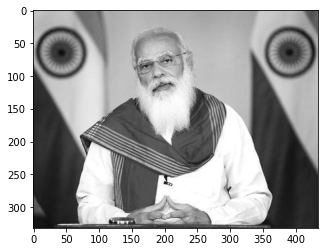

In [80]:
plt.imshow(gray, cmap='gray')

In [81]:
face_cascade = cv2.CascadeClassifier('./open_cv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./open_cv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

()

In [82]:
(x,y,w,h) = faces[0]
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

IndexError: tuple index out of range

In [6]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        return None
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

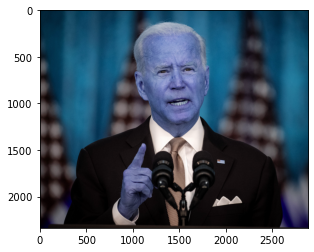

In [77]:
original_image = cv2.imread('./test_images/biden.jpg')
plt.imshow(original_image)

In [39]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Afghanistan_ To rebound after the....jpg')
cropped_image

In [40]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/boris johnson - Google Search',
 './dataset/xi jinping - Google Search',
 './dataset/narendra modi - Google Search',
 './dataset/biden - Google Search',
 './dataset/putin - Google Search']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
#remove files of format other than .png or .jpeg
for img_dir in img_dirs:
   for entry in os.scandir(img_dir):
       print(entry.path)
       image_path=entry.path.split('.')[-1]
       print(image_path)
       if image_path != 'jpg'and image_path !='jpeg':
           print(image_path)
           os.remove(entry.path)

./dataset/boris johnson - Google Search/UK_ Boris Johnson calls for talks after....jpg
jpg
./dataset/boris johnson - Google Search/Boris Johnson for Prime Minister_ and....jpg
jpg
./dataset/boris johnson - Google Search/Boris-Johnson.jpg
jpg
./dataset/boris johnson - Google Search/boris-johnson-mayor-london-29641479.jpg
jpg
./dataset/boris johnson - Google Search/boris-johnson-partygate.jpg
jpg
./dataset/boris johnson - Google Search/boris-johnson-british-prime-minister-close-up-portrait-of-face-downing-street-westminster-london-uk-2F4TJTF.jpg
jpg
./dataset/boris johnson - Google Search/Boris-Johnson.jpg_w=400&dpr=2.jpg
jpg
./dataset/boris johnson - Google Search/UK_ PM Boris Johnson_ wife announce....jpg
jpg
./dataset/boris johnson - Google Search/4000.jpg
jpg
./dataset/boris johnson - Google Search/Boris Johnson apologizes for partying....jpg
jpg
./dataset/boris johnson - Google Search/PM Boris Johnson tells NATO....jpg
jpg
./dataset/boris johnson - Google Search/50c4593fa0676d79ca60

jpg
./dataset/putin - Google Search/escalating tension in Black Sea.jpg
jpg
./dataset/putin - Google Search/Who is Vladimir Putin_ A look into the....jpg
jpg
./dataset/putin - Google Search/DjDblbpVsAEHexS-e1532797072114.jpg
jpg
./dataset/putin - Google Search/Russia-Ukraine standoff_ Putin breaks....jpg
jpg
./dataset/putin - Google Search/PUTIN1.jpg_w=400&dpr=2.jpg
jpg
./dataset/putin - Google Search/russian-president-vladimir-putin-portrait-E7CW1C.jpg
jpg
./dataset/putin - Google Search/Vladimir Putin_ US intelligence....jpg
jpg
./dataset/putin - Google Search/Putin Delays Vote That Could Help Keep....jpg
jpg
./dataset/putin - Google Search/Vladimir_Putin_12015b.jpg
jpg
./dataset/putin - Google Search/vladimir-putin-russian-president-in-2021-2J5CFCF.jpg
jpg
./dataset/putin - Google Search/Vladimir Putin Biography_ From KGB....jpg
jpg
./dataset/putin - Google Search/stock-photo-april-vladimir-putin-photo-of-the-official-visit-as-to-caracas-on-april-where-2128764227.jpg
jpg
./dataset/p

In [43]:
cropped_image_dirs = []
leader_names_dict = {}

for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('/')[-1].split()[0]
    print(leader_name)
    
    leader_names_dict[leader_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = leader_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            leader_names_dict[leader_name].append(cropped_file_path)
            count += 1    

boris
Generating cropped images in folder:  ./dataset/cropped/boris
xi
Generating cropped images in folder:  ./dataset/cropped/xi
narendra
Generating cropped images in folder:  ./dataset/cropped/narendra
biden
Generating cropped images in folder:  ./dataset/cropped/biden
putin
Generating cropped images in folder:  ./dataset/cropped/putin


In [44]:
#from stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

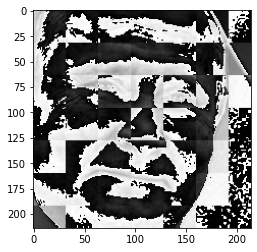

In [45]:
cropped_img = np.array(roi_color)
cropped_img.shape
#plt.imshow(cropped_img)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [46]:
leader_names_dict 

{'boris': ['./dataset/cropped/boris/boris1.png',
  './dataset/cropped/boris/boris2.png',
  './dataset/cropped/boris/boris3.png',
  './dataset/cropped/boris/boris4.png',
  './dataset/cropped/boris/boris5.png',
  './dataset/cropped/boris/boris6.png',
  './dataset/cropped/boris/boris7.png',
  './dataset/cropped/boris/boris8.png',
  './dataset/cropped/boris/boris9.png',
  './dataset/cropped/boris/boris10.png',
  './dataset/cropped/boris/boris11.png',
  './dataset/cropped/boris/boris12.png',
  './dataset/cropped/boris/boris13.png',
  './dataset/cropped/boris/boris14.png',
  './dataset/cropped/boris/boris15.png',
  './dataset/cropped/boris/boris16.png',
  './dataset/cropped/boris/boris17.png',
  './dataset/cropped/boris/boris18.png',
  './dataset/cropped/boris/boris19.png',
  './dataset/cropped/boris/boris20.png',
  './dataset/cropped/boris/boris21.png',
  './dataset/cropped/boris/boris22.png',
  './dataset/cropped/boris/boris23.png',
  './dataset/cropped/boris/boris24.png',
  './dataset/cro

In [47]:
class_dict={}
count=0
for leader_name in leader_names_dict.keys():
    class_dict[leader_name]=count
    count+=1
class_dict

{'boris': 0, 'xi': 1, 'narendra': 2, 'biden': 3, 'putin': 4}

In [48]:
x=[]
y=[]
for leader_name,training_files in leader_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[leader_name])

In [49]:
len(x[0])

4096

In [50]:
x[0]

array([[ 73],
       [ 86],
       [101],
       ...,
       [183],
       [  0],
       [  0]], dtype=uint8)

In [51]:
x=np.array(x).reshape(len(x),4096).astype(float)

In [52]:
x[0]

array([ 73.,  86., 101., ..., 183.,   0.,   0.])

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.88

In [55]:
len(x_test)

100

In [56]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       1.00      0.94      0.97        16
           2       1.00      0.88      0.93        16
           3       0.77      0.77      0.77        13
           4       0.84      0.93      0.89        29

    accuracy                           0.88       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.88      0.88      0.88       100



In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [59]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.840000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.626667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.836667,{'logisticregression__C': 5}


In [60]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [61]:
best_estimators['svm'].score(x_test,y_test)

0.88

In [62]:
best_clf = best_estimators['svm']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[21,  0,  1,  2,  2],
       [ 0, 15,  0,  0,  1],
       [ 0,  0, 14,  0,  2],
       [ 2,  0,  0, 11,  0],
       [ 0,  0,  0,  2, 27]])

Text(69.0, 0.5, 'Truth')

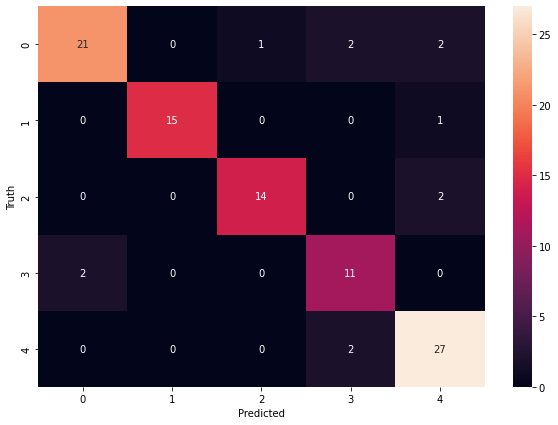

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
class_dict

{'boris': 0, 'xi': 1, 'narendra': 2, 'biden': 3, 'putin': 4}

In [66]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [67]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))